# YouTube Data API v3 - Mapping Corridor Digital's Network

### Python Libraries

In [1]:
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

import collections
import importlib
#importlib.reload(network_graphs)

## Custom modules

In [2]:
import config # api_key is stored in config.py
import youtube_requests # Functions for making youtube_requests
import data_processing # Functions for data processing    
import network_graphs # Functions for creating a network graph

Run autoloader to automatically reimport custom modules

In [3]:
%load_ext autoreload

%autoreload 1

%aimport network_graphs
%aimport youtube_requests

## Create a list of channels to graph network

Here we are graphing Corridor, Corridor Crew, Corridor Cast, Node, and the Guilletine Channel. These are all channels related to the Corridor Digital business.

In [4]:
CORRIDOR_FIVE = ['UCNSeDrWRGxx5p2l3tj7RWQw',
                'UCsn6cjffsvyOZCZxvGoJxGg',
                'UCSpFnDQr88xCZ80N-X7t0nQ',
                'UCI4Wh0EQPjGx2jJLjmTsFBQ',
                'UCb8ewylk7d2M_1dLGEiFmuQ']

# Youtube Channel Details by Network

In [5]:
%%time
# Get a list of dictionaries, where each dictionary represents details for a specific channel
CHANNELS_DETAILS_ITEMS_LIST = youtube_requests.youtube_channel_details_by_network(CORRIDOR_FIVE, 3)

# Graph the network of channels
G = network_graphs.create_nx_graph(CHANNELS_DETAILS_ITEMS_LIST, True)

# Extract a columnar list of channel details
CHANNELS_DETAILS_LIST = data_processing.extract_channel_details(CHANNELS_DETAILS_ITEMS_LIST)

# Create a dataframe
DF = data_processing.create_df_from_details_list(CHANNELS_DETAILS_LIST)

# Graph G using matplotlib - gets messy with lots of data
#network_graphs.graph_nx_graph(G)

Havent seen this list, request and cache
25 total neighbors; 0 out of 5 channels do not feature channels
97 total neighbors; 2 out of 20 channels do not feature channels
253 total neighbors; 11 out of 86 channels do not feature channels
CPU times: user 18.5 s, sys: 1.39 s, total: 19.9 s
Wall time: 38.1 s


In [30]:
CHANNELS_DETAILS_ITEMS_LIST[0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet', 'contentDetails', 'statistics', 'topicDetails', 'status', 'brandingSettings', 'contentOwnerDetails', 'distance'])

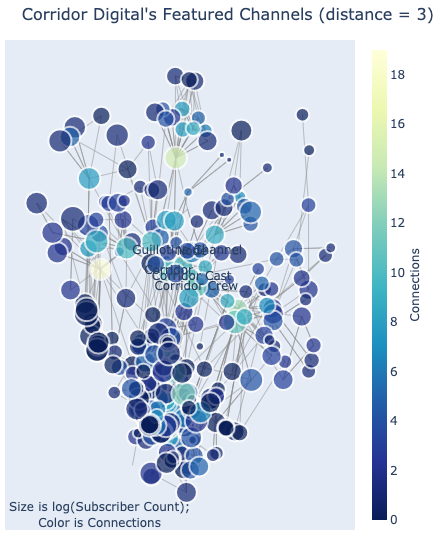

In [27]:
fig = network_graphs.plotly_network_graph(G, "Connections", "Corridor Digital's Featured Channels (distance = 3)")
fig # Interactive version of the figure for notebooks

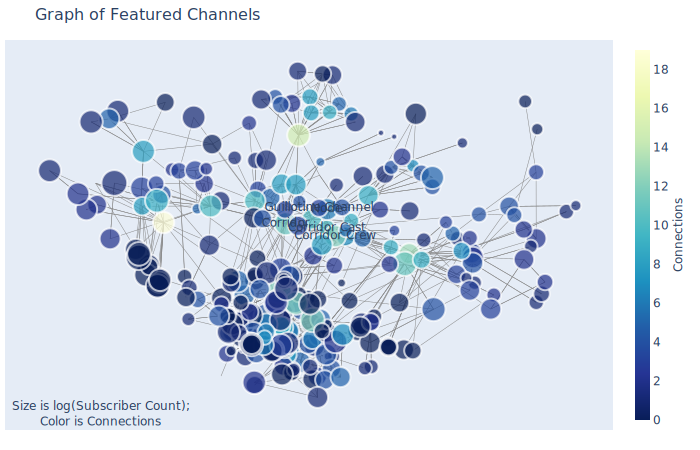

In [16]:
# Show figure for GitHub
fig.show("svg")

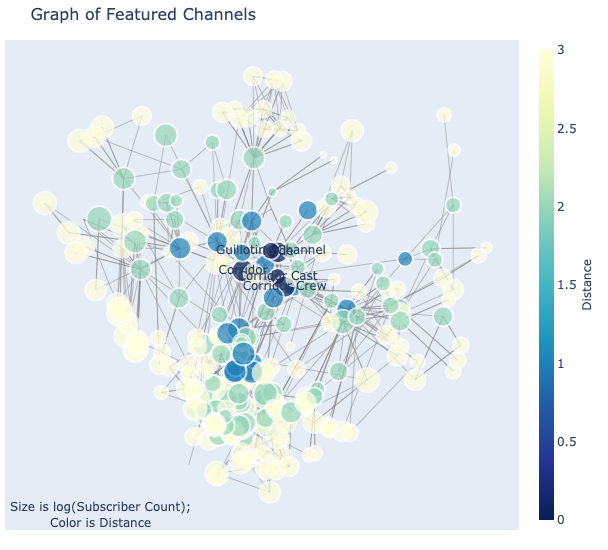

In [17]:
fig = network_graphs.plotly_network_graph(G, "Distance")
fig

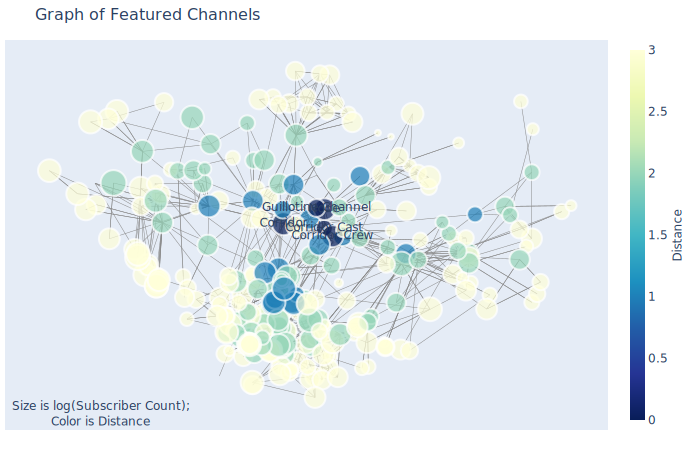

In [18]:
# Show figure for GitHub
fig.show("svg")

## Page Rank, In-Degree centrality, Betweeness Centrality, and In-Degree value

In [33]:
page_rank_series = pd.Series(data = network_graphs.simple_page_rank(G), index = list(G.nodes().keys()))
DF['page_rank'] = DF['id'].map(lambda x:page_rank_series[x])

betweenness_dict = nx.betweenness_centrality(G)
DF['betweenness_centrality'] = DF['id'].map(lambda x:betweenness_dict[x])

in_degree_centrality_dict = nx.in_degree_centrality(G)
DF['in_degree_centrality'] = DF['id'].map(lambda x:in_degree_centrality_dict[x])

in_degree_dict = {node:G.in_degree()[node] for node in G.nodes()}
DF['in_degree'] = DF['id'].map(lambda x:in_degree_dict[x])

degree_dict = {node:G.degree()[node] for node in G.nodes()}
DF['degree'] = DF['id'].map(lambda x:degree_dict[x])

FEATURES = ['title','featuredChannelsCount','degree','in_degree','betweenness_centrality','in_degree_centrality','page_rank','subscriberCount','viewCount']

### Sort channels by page rank

In [40]:
print(DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8).to_markdown())

|    | title           |   page_rank |   featuredChannelsCount |   degree |   in_degree |   betweenness_centrality |   in_degree_centrality |   subscriberCount |   viewCount |
|---:|:----------------|------------:|------------------------:|---------:|------------:|-------------------------:|-----------------------:|------------------:|------------:|
|  1 | Corridor        | 0.0337084   |                      11 |       29 |          18 |              0.197719    |              0.0608108 |           8080000 |  1469507306 |
| 10 | devinsupertramp | 0.0127246   |                      10 |       25 |          15 |              0.10919     |              0.0506757 |           5920000 |  1438824815 |
| 92 | TomSka          | 0.0167781   |                      15 |       28 |          13 |              0.0492833   |              0.0439189 |           6440000 |  1657474725 |
| 44 | LetsPlay        | 3.69413e-17 |                       1 |       12 |          11 |              1.71782e-05 |    

In [9]:
DF[FEATURES].sort_values(
    'page_rank', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
35,TechLinked,1260000,183056413,0.050954,6,12,6,0.000006,0.020270
50,LMG Clips,178000,20307801,0.050954,6,12,6,0.000006,0.020270
65,Carpool Critics,42400,425975,0.050954,6,11,5,0.000000,0.016892
76,ShortCircuit,948000,56517459,0.050954,6,11,5,0.000000,0.016892
18,Linus Tech Tips,11500000,3924848893,0.050954,6,13,7,0.007908,0.023649
89,Techquickie,3530000,527112792,0.050954,6,12,6,0.000006,0.020270
2,Corridor Crew,4110000,713277250,0.039965,12,20,8,0.112594,0.027027
105,Channel Super Fun,740000,97736777,0.035747,4,10,6,0.000000,0.020270


### Sort channels by betweenness centrality.

In [10]:
DF[FEATURES].sort_values(
    'betweenness_centrality', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
1,Corridor,8080000,1469507306,0.033708,11,29,18,0.197719,0.060811
2,Corridor Crew,4110000,713277250,0.039965,12,20,8,0.112594,0.027027
10,devinsupertramp,5920000,1438824815,0.012725,10,25,15,0.109190,0.050676
22,Nukazooka,2260000,670559796,0.024340,8,19,11,0.082699,0.037162
23,Mike Diva,650000,142893349,0.011259,7,15,8,0.079615,0.027027
9,Film Riot,1670000,191825386,0.015556,13,23,10,0.079231,0.033784
15,SoKrispyMedia,1150000,319054747,0.015201,10,18,8,0.074173,0.027027
0,Corridor Cast,111000,5011173,0.021945,10,14,4,0.051500,0.013514


### Sort channels by in_degree centrality.

In [11]:
DF[FEATURES].sort_values(
    'in_degree_centrality', ascending=False).head(8)

,title,subscriberCount,viewCount,page_rank,featuredChannelsCount,degree,in_degree,betweenness_centrality,in_degree_centrality
1,Corridor,8080000,1469507306,3.370840e-02,11,29,18,0.197719,0.060811
10,devinsupertramp,5920000,1438824815,1.272459e-02,10,25,15,0.109190,0.050676
92,TomSka,6440000,1657474725,1.677811e-02,15,28,13,0.049283,0.043919
44,LetsPlay,3850000,2437731719,3.694135e-17,1,12,11,0.000017,0.037162
22,Nukazooka,2260000,670559796,2.433996e-02,8,19,11,0.082699,0.037162
20,RocketJump,9000000,1904596631,1.446053e-10,3,13,10,0.025846,0.033784
9,Film Riot,1670000,191825386,1.555646e-02,13,23,10,0.079231,0.033784
14,Rooster Teeth,9470000,6081509776,4.678766e-04,12,21,9,0.018583,0.030405


## Strongly Connected Components

In [12]:
# Create a list of strongly connected components
scc_list = [scc for scc in nx.strongly_connected_components(G)]

# Grab the largest strongly connected component
largest_scc_index = [i for i,cn in enumerate(scc_list) if len(cn) == max([len(cnn) for cnn in scc_list])][0]

# Graph out the subgraph for the largest subset of strongly connected components
H = G.subgraph(list(scc_list[largest_scc_index]))

Plot of our subgraph of strongly connected components

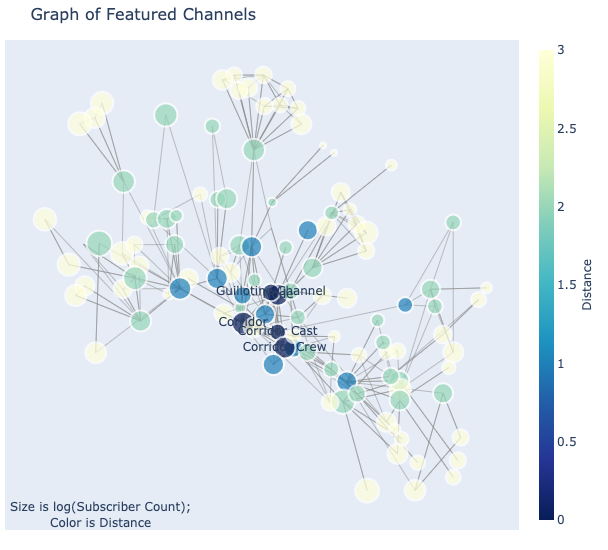

In [21]:
#network_graphs.graph_nx_graph(H)
fig = network_graphs.plotly_network_graph(H, 'Distance')
fig

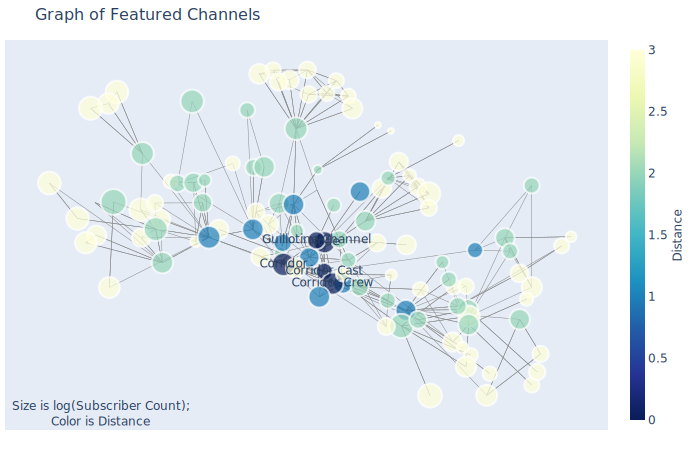

In [22]:
fig.show('svg')

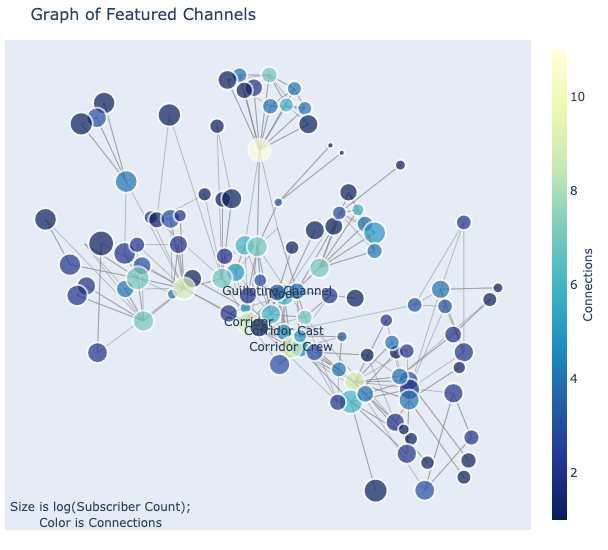

In [23]:
fig = network_graphs.plotly_network_graph(H, 'Connections')
fig

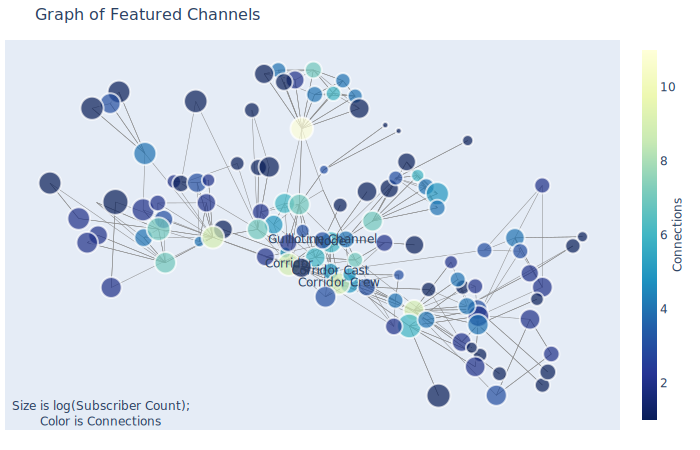

In [24]:
fig.show('svg')